<a href="https://colab.research.google.com/github/SirAlchemist1/Loan-Prediction-ML-project-/blob/main/Suryodaya's_Classifier_Performance_Evaluation_on_Loan_Applications_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries for data manipulation and machine learning
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import confusion_matrix, classification_report  # For performance evaluation
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA
from sklearn.svm import SVC  # For support vector classification


In [ ]:
# Mounting Google Drive to access datasets and save results
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load training and testing data from Google Drive
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TrainingData-2.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TestingData-2.csv')

In [ ]:
# Check the first few rows of the training data to understand its structure
print(train_data.head())

# Check the shape of the datasets to confirm the number of samples and features
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

# Check for missing values in the datasets to ensure data quality
print("Missing Values in Training Data:", train_data.isnull().sum())
print("Missing Values in Testing Data:", test_data.isnull().sum())

   Age  Annual Income  Credit Score  Experience  Loan Amount  Loan Duration  \
0   45          39948           617          22        13152             48   
1   38          39709           628          15        26045             48   
2   47          40724           570          26        17627             36   
3   58          69084           545          34        37898             96   
4   58          51250           564          39        12741             48   

   Number of Dependents  Monthly Debt Payment  Creditcard Utilizatio Rate  \
0                     2                   183                    0.354418   
1                     1                   496                    0.087827   
2                     2                   902                    0.137414   
3                     1                   755                    0.267587   
4                     0                   337                    0.367380   

   Number of Open Credit Lines  ...  Total Assets  TotalLiabil

In [ ]:
# Separate features and labels
X_train = train_data.iloc[:, :-1]  # All rows, all columns except the last (features)
y_train = train_data.iloc[:, -1]    # All rows, only the last column (LoanApproved label)
X_test = test_data.iloc[:, :-1]     # All rows, all columns except the last (features)
y_test = test_data.iloc[:, -1]      # All rows, only the last column (LoanApproved label)

#Print feature names and summary
print("Feature Names:", X_train.columns.tolist())
print("Feature Summary:\n", X_train.describe())

Feature Names: ['Age', 'Annual Income', 'Credit Score', 'Experience', 'Loan Amount', 'Loan Duration', 'Number of Dependents', 'Monthly Debt Payment', 'Creditcard Utilizatio Rate', 'Number of Open Credit Lines', 'Number of Credit Inquries', 'Debt to Income Ratio', 'Bankruptcy History', 'Previous Loan Defaults', 'Payment History', 'Length of Credit History', 'Savings Account Balance', 'Checking Account Balance', 'Total Assets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio']
Feature Summary:
               Age  Annual Income  Credit Score  Experience    Loan Amount  \
count  900.000000     900.000000    900.000000  900.000000     900.000000   
mean    40.856667   74600.027778    577.393333   18.644444   23048.200000   
std     11.313635   49469.234728     49.301740   11.161182   12631.654136   
min     18.000000   15000.000000    380.000000    0.000000    3729.000000   
25%     33.

In [ ]:
# Scaling the features for better performance of some classifiers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LDA Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       200
           1       0.86      0.97      0.91       200

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.90       400
weighted avg       0.91      0.91      0.90       400



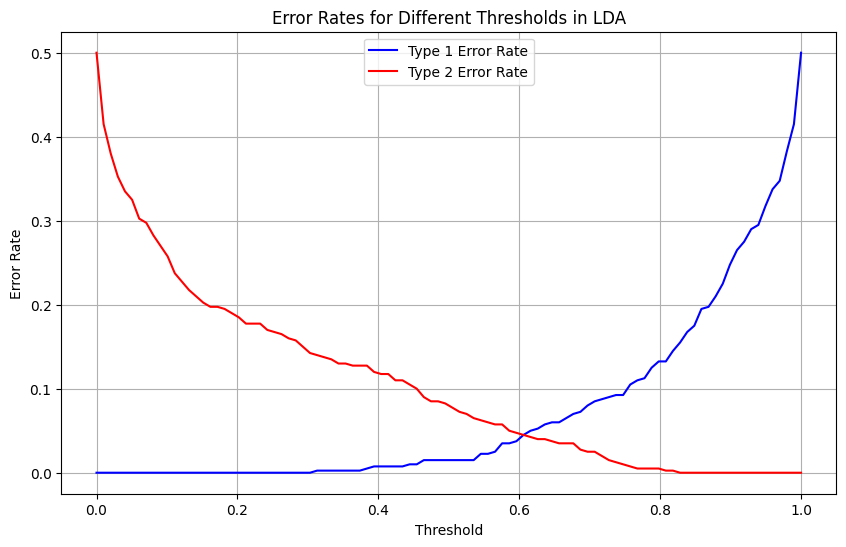

In [ ]:
# Linear discriminant analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

# Initialize the LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the scaled training data
lda.fit(X_train_scaled, y_train)

# Predict the labels for the testing data
y_pred_lda = lda.predict(X_test_scaled)

# Print the classification report for LDA
print("LDA Classification Report:")
print(classification_report(y_test, y_pred_lda))

# Varies the threshold for classification and compute error rates
# Get the predicted probabilities
y_prob_lda = lda.predict_proba(X_test_scaled)[:, 1]

# Defines thresholds to evaluate
thresholds = np.linspace(0, 1, 100)
type_1_errors = []
type_2_errors = []

for threshold in thresholds:
    # Apply threshold to predict class labels
    y_pred_thresholded = (y_prob_lda >= threshold).astype(int)

    # Calculate Type 1 and Type 2 errors
    type_1_error = np.sum((y_pred_thresholded == 0) & (y_test == 1))  # Denied but Approved
    type_2_error = np.sum((y_pred_thresholded == 1) & (y_test == 0))  # Approved but Denied

    type_1_errors.append(type_1_error)
    type_2_errors.append(type_2_error)

# Calculate error rates
type_1_error_rate = np.array(type_1_errors) / len(y_test)  # Type 1 error rate
type_2_error_rate = np.array(type_2_errors) / len(y_test)  # Type 2 error rate

# Plot the error rates
plt.figure(figsize=(10, 6))
plt.plot(thresholds, type_1_error_rate, label='Type 1 Error Rate', color='blue')
plt.plot(thresholds, type_2_error_rate, label='Type 2 Error Rate', color='red')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates for Different Thresholds in LDA')
plt.legend()
plt.grid()
plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       200
           1       0.86      0.83      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

Confusion Matrix:
[[173  27]
 [ 33 167]]


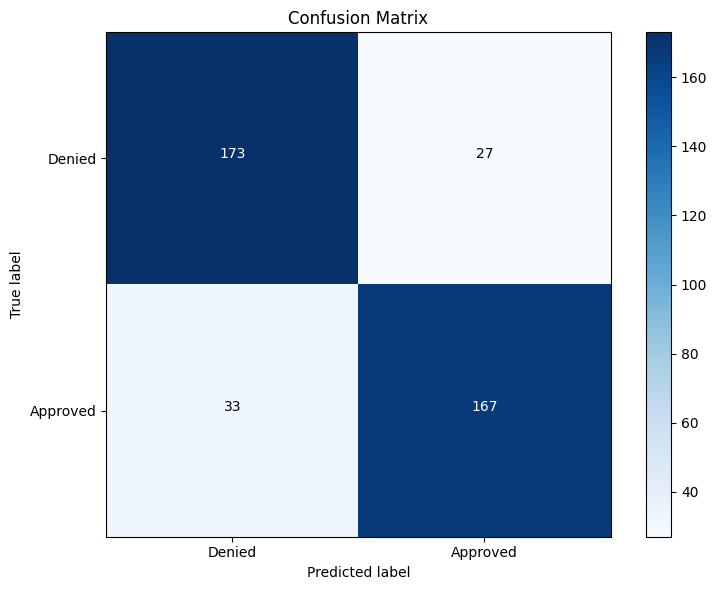

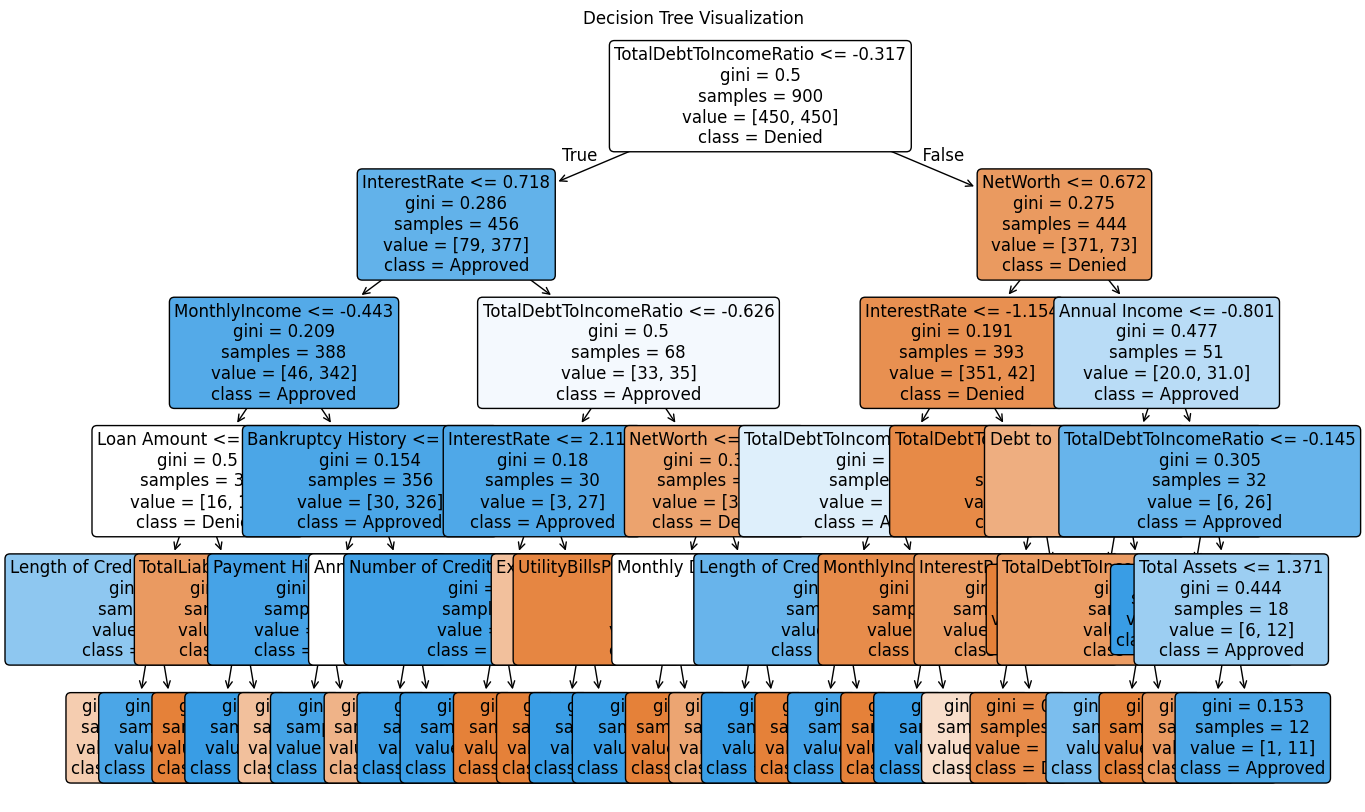

In [ ]:
# Designing a decision tree using a built-in function
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


# Decision Tree Classifier using CART algorithm (default in sklearn)
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)  # Hyperparameter tuning

# Fits the Decision Tree model on the scaled training data
dt_classifier.fit(X_train_scaled, y_train)

# Predicts the labels for the testing data
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Print the classification report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for better visualization
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizes the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Denied', 'Approved'])
plt.yticks(tick_marks, ['Denied', 'Approved'])

# Labeling the matrix cells
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Visualizing the Decision Tree
feature_names = X_train.columns.tolist()
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier,
          filled=True,
          feature_names=feature_names,
          class_names=['Denied', 'Approved'],
          rounded=True,
          fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()

kNN Classification Report (k=1):
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       200
           1       0.80      0.88      0.83       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400

Type 1 Error Rate (k=1): 0.12
Type 2 Error Rate (k=1): 0.23
Confusion Matrix:
[[155  45]
 [ 25 175]]


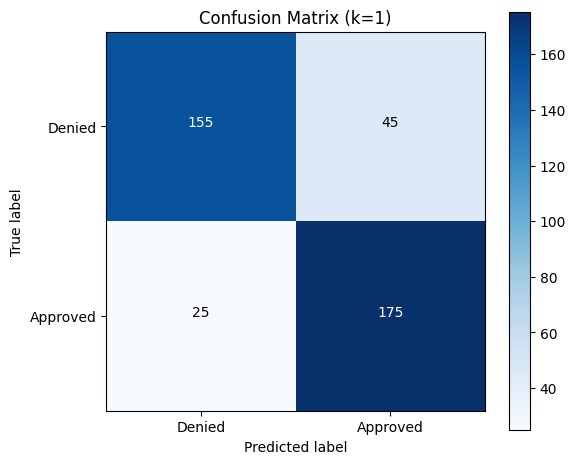

ROC AUC Score (k=1): 0.91
kNN Classification Report (k=3):
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       200
           1       0.80      0.88      0.83       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400

Type 1 Error Rate (k=3): 0.12
Type 2 Error Rate (k=3): 0.23
Confusion Matrix:
[[155  45]
 [ 25 175]]


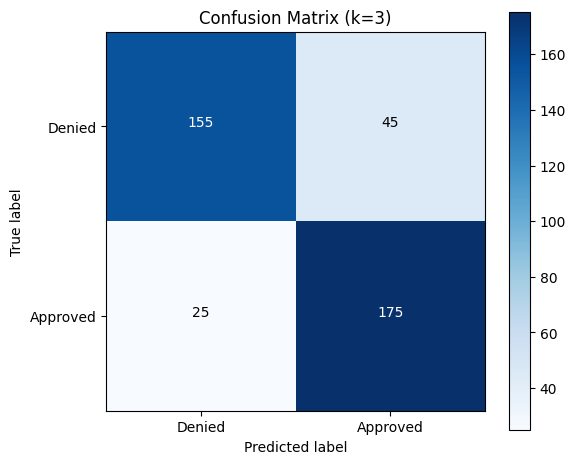

ROC AUC Score (k=3): 0.91
kNN Classification Report (k=5):
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       200
           1       0.80      0.88      0.83       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400

Type 1 Error Rate (k=5): 0.12
Type 2 Error Rate (k=5): 0.23
Confusion Matrix:
[[155  45]
 [ 25 175]]


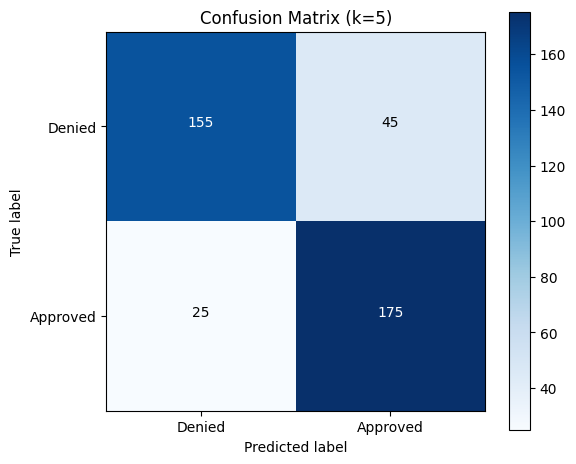

ROC AUC Score (k=5): 0.91
kNN Classification Report (k=10):
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       200
           1       0.80      0.88      0.83       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400

Type 1 Error Rate (k=10): 0.12
Type 2 Error Rate (k=10): 0.23
Confusion Matrix:
[[155  45]
 [ 25 175]]


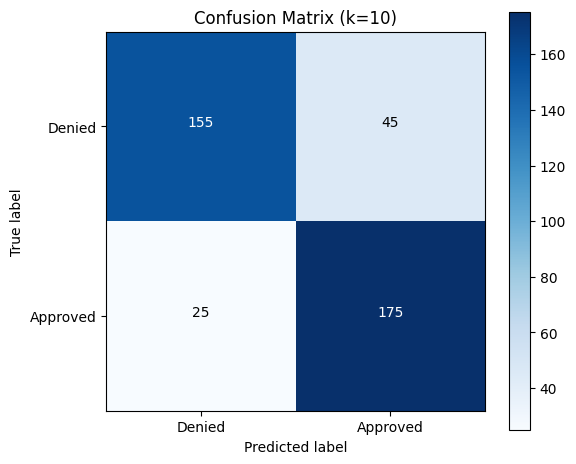

ROC AUC Score (k=10): 0.91
    k  type_1_error_rate  type_2_error_rate
0   1              0.125              0.225
1   3              0.125              0.225
2   5              0.125              0.225
3  10              0.125              0.225


In [ ]:
#Evaluates the performance of kNN algorithm for k = 1, 3, 5, 10 (Hyperparameter used)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Defines the parameter grid for kNN
param_grid = {
    'n_neighbors': [1, 3, 5, 10]
}

# Create a kNN classifier
knn_classifier = KNeighborsClassifier()

# Set up the grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Prepare a list to store results for analysis
results = []

# Iterate over different values of k for kNN
for k in param_grid['n_neighbors']:
    # Predict the labels for the testing data using the best estimator from grid search
    y_pred_knn = grid_search.predict(X_test_scaled)

    # Print the classification report for kNN
    print(f"kNN Classification Report (k={k}):")
    print(classification_report(y_test, y_pred_knn))

    # Calculate Type 1 and Type 2 error rates
    type_1_errors = np.sum((y_pred_knn == 0) & (y_test == 1))  # False negatives
    type_2_errors = np.sum((y_pred_knn == 1) & (y_test == 0))  # False positives
    type_1_error_rate = type_1_errors / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0  # Total approved
    type_2_error_rate = type_2_errors / np.sum(y_test == 0) if np.sum(y_test == 0) > 0 else 0  # Total denied

    print(f"Type 1 Error Rate (k={k}): {type_1_error_rate:.2f}")
    print(f"Type 2 Error Rate (k={k}): {type_2_error_rate:.2f}")

    # Store results for further analysis
    results.append({
        'k': k,
        'type_1_error_rate': type_1_error_rate,
        'type_2_error_rate': type_2_error_rate,
    })

    # Confusion Matrix for better visualization
    conf_matrix = confusion_matrix(y_test, y_pred_knn)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Visualizing the confusion matrix
    plt.figure(figsize=(6, 5))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (k={k})')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Denied', 'Approved'])
    plt.yticks(tick_marks, ['Denied', 'Approved'])

    # Labeling the matrix cells
    thresh = conf_matrix.max() / 2.
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

    # Calculates and print ROC-AUC score
    y_proba_knn = grid_search.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class
    roc_auc = roc_auc_score(y_test, y_proba_knn)
    print(f"ROC AUC Score (k={k}): {roc_auc:.2f}")

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)
print(results_df)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       200
           1       0.86      0.96      0.91       200

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.90       400
weighted avg       0.91      0.91      0.90       400

Type 1 Error Rate: 0.04
Type 2 Error Rate: 0.15
Confusion Matrix:
[[169  31]
 [  7 193]]


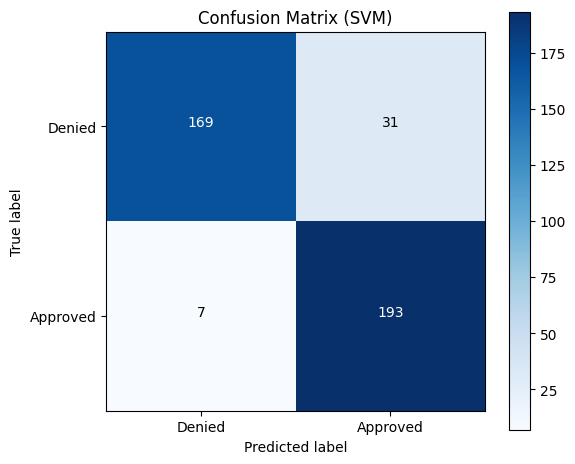

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Create an SVM classifier with RBF kernel and soft margin
C_value = 1.0  # Regularization parameter
svm_classifier = SVC(kernel='rbf', C=C_value)

# Fit the SVM model on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels for the testing data
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Print the classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Calculate Type 1 and Type 2 error rates
type_1_errors = np.sum((y_pred_svm == 0) & (y_test == 1))  # False negatives
type_2_errors = np.sum((y_pred_svm == 1) & (y_test == 0))  # False positives
type_1_error_rate = type_1_errors / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0
type_2_error_rate = type_2_errors / np.sum(y_test == 0) if np.sum(y_test == 0) > 0 else 0

print(f"Type 1 Error Rate: {type_1_error_rate:.2f}")
print(f"Type 2 Error Rate: {type_2_error_rate:.2f}")

# Confusion Matrix for better visualization
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Denied', 'Approved'])
plt.yticks(tick_marks, ['Denied', 'Approved'])

# Labeling the matrix cells
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
def calculate_error_rates(y_true, y_pred):
    type_1_errors = sum((y_true == 0) & (y_pred == 1))  # Denied predicted as Approved
    type_2_errors = sum((y_true == 1) & (y_pred == 0))  # Approved predicted as Denied
    total = len(y_true)

    type_1_rate = type_1_errors / total
    type_2_rate = type_2_errors / total

    return type_1_rate, type_2_rate

# Calculate error rates for each classifier

# For LDA
type_1_rate_lda, type_2_rate_lda = calculate_error_rates(y_test, y_pred_lda)
print(f"LDA Type 1 Error Rate: {type_1_rate_lda:.2f}, Type 2 Error Rate: {type_2_rate_lda:.2f}")

# For Decision Tree
type_1_rate_dt, type_2_rate_dt = calculate_error_rates(y_test, y_pred_dt)
print(f"Decision Tree Type 1 Error Rate: {type_1_rate_dt:.2f}, Type 2 Error Rate: {type_2_rate_dt:.2f}")

# For kNN - calculate for each value of k
for k in [1, 3, 5, 10]:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred_knn = knn_classifier.predict(X_test_scaled)

    type_1_rate_knn, type_2_rate_knn = calculate_error_rates(y_test, y_pred_knn)
    print(f"kNN (k={k}) Type 1 Error Rate: {type_1_rate_knn:.2f}, Type 2 Error Rate: {type_2_rate_knn:.2f}")

# For SVM
type_1_rate_svm, type_2_rate_svm = calculate_error_rates(y_test, y_pred_svm)
print(f"SVM Type 1 Error Rate: {type_1_rate_svm:.2f}, Type 2 Error Rate: {type_2_rate_svm:.2f}")

LDA Type 1 Error Rate: 0.08, Type 2 Error Rate: 0.01
Decision Tree Type 1 Error Rate: 0.07, Type 2 Error Rate: 0.08
kNN (k=1) Type 1 Error Rate: 0.13, Type 2 Error Rate: 0.10
kNN (k=3) Type 1 Error Rate: 0.14, Type 2 Error Rate: 0.06
kNN (k=5) Type 1 Error Rate: 0.13, Type 2 Error Rate: 0.04
kNN (k=10) Type 1 Error Rate: 0.11, Type 2 Error Rate: 0.06
SVM Type 1 Error Rate: 0.08, Type 2 Error Rate: 0.02


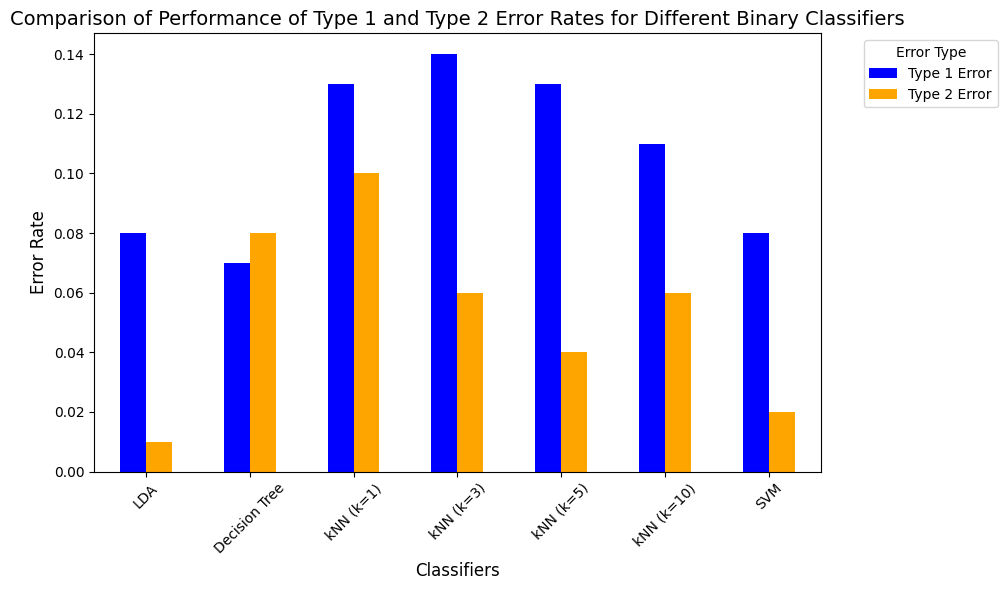


Conclusion:
- In the first part of the project, the classifiers were trained using the original features from the loan application dataset. The **Decision Tree** classifier demonstrated a low Type 1 error rate of 0.07, but its Type 2 error rate was notably higher at 0.08, suggesting that while it is effective at identifying denied applications, it struggles more with correctly identifying approved loans.
- The **LDA** classifier performed very well, with a Type 1 error rate of 0.08 and an exceptionally low Type 2 error rate of 0.01, making it the best at correctly identifying approved applications with minimal false negatives.
- The **kNN** classifier showed varying performance depending on the value of k. For lower values of k, such as k=1 and k=3, it had high Type 1 error rates of 0.13 and 0.14, respectively, while the Type 2 error rates improved as k increased. The best performance was observed at **k=5**, where the Type 1 error decreased to 0.13 and the Type 2 error dropped to 0.0

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Results data
classifiers = ['LDA', 'Decision Tree', 'kNN (k=1)', 'kNN (k=3)', 'kNN (k=5)', 'kNN (k=10)', 'SVM']
type_1_error = [0.08, 0.07, 0.13, 0.14, 0.13, 0.11, 0.08]
type_2_error = [0.01, 0.08, 0.10, 0.06, 0.04, 0.06, 0.02]

# Creating a DataFrame for better handling
error_rates_df = pd.DataFrame({
    "Classifier": classifiers,
    "Type 1 Error": type_1_error,
    "Type 2 Error": type_2_error
})

# Plotting the error rates
fig, ax = plt.subplots(figsize=(10, 6))
error_rates_df.set_index("Classifier")[["Type 1 Error", "Type 2 Error"]].plot(kind="bar", ax=ax, color=["blue", "orange"])

# Adding titles and labels
ax.set_title("Comparison of Performance of Type 1 and Type 2 Error Rates for Different Binary Classifiers", fontsize=14)
ax.set_ylabel("Error Rate", fontsize=12)
ax.set_xlabel("Classifiers", fontsize=12)
ax.legend(title="Error Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Improving layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conclusion = """
Conclusion:
- In the first part of the project, the classifiers were trained using the original features from the loan application dataset. The **Decision Tree** classifier demonstrated a low Type 1 error rate of 0.07, but its Type 2 error rate was notably higher at 0.08, suggesting that while it is effective at identifying denied applications, it struggles more with correctly identifying approved loans.
- The **LDA** classifier performed very well, with a Type 1 error rate of 0.08 and an exceptionally low Type 2 error rate of 0.01, making it the best at correctly identifying approved applications with minimal false negatives.
- The **kNN** classifier showed varying performance depending on the value of k. For lower values of k, such as k=1 and k=3, it had high Type 1 error rates of 0.13 and 0.14, respectively, while the Type 2 error rates improved as k increased. The best performance was observed at **k=5**, where the Type 1 error decreased to 0.13 and the Type 2 error dropped to 0.04, making this a relatively good choice with further potential tuning.
- The **SVM** classifier exhibited stable performance, with a Type 1 error rate of 0.08 and a Type 2 error rate of 0.02. Its consistent performance across both error types makes it a strong candidate, particularly in scenarios where minimizing false negatives (Type 2 errors) is important.
- Overall, while **LDA** and **SVM** both demonstrated strong performance, **SVM** stands out as the most reliable classifier in this context due to its ability to maintain low error rates across both metrics. The **kNN** classifier at k=5 also showed promise, but requires careful tuning to balance error rates.
- Future work could focus on further refining the hyperparameters for kNN and exploring other SVM kernels to potentially enhance the performance of these classifiers even further.
"""

print(conclusion)

PART-2

In [ ]:
#PART-2 Adding PCA TO SVM AND KNN
from sklearn.decomposition import PCA

# Initialize PCA to retain 95% of the variance in the dataset
pca = PCA(n_components=0.95)

# Fit PCA on the standardized training data and transform it
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the testing data using the fitted PCA model
X_test_pca = pca.transform(X_test_scaled)

# Check and print the shape of the original and PCA-transformed data
print("Original Training Data Shape:", X_train_scaled.shape)  # Shape before PCA
print("PCA Training Data Shape:", X_train_pca.shape)          # Shape after PCA
print("Original Testing Data Shape:", X_test_scaled.shape)    # Shape before PCA
print("PCA Testing Data Shape:", X_test_pca.shape)            # Shape after PCA

Original Training Data Shape: (900, 27)
PCA Training Data Shape: (900, 21)
Original Testing Data Shape: (400, 27)
PCA Testing Data Shape: (400, 21)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define a function to calculate Type 1 and Type 2 error rates
def calculate_error_rates(y_true, y_pred):
    """
    Calculate Type 1 and Type 2 error rates.

    Type 1 Error Rate: False negatives (actual positive predicted as negative)
    Type 2 Error Rate: False positives (actual negative predicted as positive)

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels

    Returns:
    - type_1_error_rate: Type 1 error rate
    - type_2_error_rate: Type 2 error rate
    """
    type_1_errors = np.sum((y_pred == 0) & (y_true == 1))  # False negatives
    type_2_errors = np.sum((y_pred == 1) & (y_true == 0))  # False positives
    type_1_error_rate = type_1_errors / np.sum(y_true == 1) if np.sum(y_true == 1) > 0 else 0  # Total approved
    type_2_error_rate = type_2_errors / np.sum(y_true == 0) if np.sum(y_true == 0) > 0 else 0  # Total denied

    return type_1_error_rate, type_2_error_rate

# Train kNN classifier with PCA
knn_classifier_pca = KNeighborsClassifier(n_neighbors=5)  # You can change k if needed
knn_classifier_pca.fit(X_train_pca, y_train)  # Fit the model on PCA-transformed training data

# Make predictions on the PCA-transformed test data
y_pred_knn_pca = knn_classifier_pca.predict(X_test_pca)

# Print the classification report
print("kNN with PCA Classification Report:")
print(classification_report(y_test, y_pred_knn_pca))

# Calculate error rates for kNN with PCA
type_1_rate_knn_pca, type_2_rate_knn_pca = calculate_error_rates(y_test, y_pred_knn_pca)
print(f"kNN (with PCA) Type 1 Error Rate: {type_1_rate_knn_pca:.2f}, Type 2 Error Rate: {type_2_rate_knn_pca:.2f}")

kNN with PCA Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       200
           1       0.76      0.92      0.83       200

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400

kNN (with PCA) Type 1 Error Rate: 0.09, Type 2 Error Rate: 0.29


In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Apply PCA with 5 components
pca_5 = PCA(n_components=5)  # Initialize PCA to retain 5 principal components
X_train_pca_5 = pca_5.fit_transform(X_train_scaled)  # Fit PCA on the scaled training data and transform it
X_test_pca_5 = pca_5.transform(X_test_scaled)  # Transform the testing data using the fitted PCA model

# Train kNN Classifier with PCA features
knn_classifier_pca_5 = KNeighborsClassifier(n_neighbors=5)  # Choose the number of neighbors (k)
knn_classifier_pca_5.fit(X_train_pca_5, y_train)  # Fit the model on PCA-transformed training data

# Make predictions on the PCA-transformed test data
y_pred_knn_pca_5 = knn_classifier_pca_5.predict(X_test_pca_5)  # Predict labels for the test data

# Print the classification report
print("kNN with PCA (5 components) Classification Report:")
print(classification_report(y_test, y_pred_knn_pca_5))  # Output precision, recall, and F1-score

# Calculate error rates for kNN with PCA
type_1_rate_knn_pca_5, type_2_rate_knn_pca_5 = calculate_error_rates(y_test, y_pred_knn_pca_5)  # Calculate error rates
print(f"kNN (with PCA - 5 components) Type 1 Error Rate: {type_1_rate_knn_pca_5:.2f}, Type 2 Error Rate: {type_2_rate_knn_pca_5:.2f}")

kNN with PCA (5 components) Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       200
           1       0.83      0.90      0.87       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

kNN (with PCA - 5 components) Type 1 Error Rate: 0.10, Type 2 Error Rate: 0.18


In [ ]:
# Calculate Type 1 and Type 2 Error Rates for kNN with PCA
type2_errors_knn_pca_5 = np.sum((y_test == 1) & (y_pred_knn_pca_5 == 0))  # False negatives (Type 2)
type1_errors_knn_pca_5 = np.sum((y_test == 0) & (y_pred_knn_pca_5 == 1))  # False positives (Type 1)

# Calculate error rates
type1_error_rate_knn_pca_5 = type1_errors_knn_pca_5 / np.sum(y_test == 0) if np.sum(y_test == 0) > 0 else 0  # Total denied
type2_error_rate_knn_pca_5 = type2_errors_knn_pca_5 / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0  # Total approved

# Print the error rates
print(f"kNN (K=5) PCA Type 1 Error Rate: {type1_error_rate_knn_pca_5:.2f}")  # False positives
print(f"kNN (K=5) PCA Type 2 Error Rate: {type2_error_rate_knn_pca_5:.2f}")  # False negatives

kNN (K=5) PCA Type 1 Error Rate: 0.18
kNN (K=5) PCA Type 2 Error Rate: 0.10


In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Apply PCA with 10 components
pca_10 = PCA(n_components=10)
X_train_pca_10 = pca_10.fit_transform(X_train_scaled)
X_test_pca_10 = pca_10.transform(X_test_scaled)

# Train kNN Classifier
knn_classifier_pca_10 = KNeighborsClassifier(n_neighbors=5)  # Choose k if needed
knn_classifier_pca_10.fit(X_train_pca_10, y_train)

# Make predictions on the PCA-transformed test data
y_pred_knn_pca_10 = knn_classifier_pca_10.predict(X_test_pca_10)

# Calculate Type 1 and Type 2 Error Rates
type2_errors_knn_pca_10 = np.sum((y_test == 1) & (y_pred_knn_pca_10 == 0))  # False negatives (Type 2)
type1_errors_knn_pca_10 = np.sum((y_test == 0) & (y_pred_knn_pca_10 == 1))  # False positives (Type 1)

# Calculate error rates
type1_error_rate_knn_pca_10 = type1_errors_knn_pca_10 / np.sum(y_test == 0) if np.sum(y_test == 0) > 0 else 0  # Total denied
type2_error_rate_knn_pca_10 = type2_errors_knn_pca_10 / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0  # Total approved

# Print the error rates
print(f"kNN (K=10) PCA Type 1 Error Rate: {type1_error_rate_knn_pca_10:.2f}")  # False positives
print(f"kNN (K=10) PCA Type 2 Error Rate: {type2_error_rate_knn_pca_10:.2f}")  # False negatives

kNN (K=10) PCA Type 1 Error Rate: 0.20
kNN (K=10) PCA Type 2 Error Rate: 0.12


In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Apply PCA with 15 components
pca_15 = PCA(n_components=15)
X_train_pca_15 = pca_15.fit_transform(X_train_scaled)
X_test_pca_15 = pca_15.transform(X_test_scaled)

# Train kNN Classifier
knn_classifier_pca_15 = KNeighborsClassifier(n_neighbors=5)  # Choose k if needed
knn_classifier_pca_15.fit(X_train_pca_15, y_train)

# Make predictions on the PCA-transformed test data
y_pred_knn_pca_15 = knn_classifier_pca_15.predict(X_test_pca_15)

# Calculate Type 1 and Type 2 Error Rates
type1_errors_knn_pca_15 = np.sum((y_test == 0) & (y_pred_knn_pca_15 == 1))  # False positives (Type 1)
type2_errors_knn_pca_15 = np.sum((y_test == 1) & (y_pred_knn_pca_15 == 0))  # False negatives (Type 2)

# Calculate error rates based on the total counts in each category
type1_error_rate_knn_pca_15 = type1_errors_knn_pca_15 / np.sum(y_test == 0) if np.sum(y_test == 0) > 0 else 0  # Total denied
type2_error_rate_knn_pca_15 = type2_errors_knn_pca_15 / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0  # Total approved

# Print the error rates
print(f"kNN (K=15) PCA Type 1 Error Rate: {type1_error_rate_knn_pca_15:.2f}")  # False positives
print(f"kNN (K=15) PCA Type 2 Error Rate: {type2_error_rate_knn_pca_15:.2f}")  # False negatives

kNN (K=15) PCA Type 1 Error Rate: 0.27
kNN (K=15) PCA Type 2 Error Rate: 0.11


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np

# Apply PCA with 5 components
pca_5 = PCA(n_components=5)
X_train_pca_5 = pca_5.fit_transform(X_train_scaled)
X_test_pca_5 = pca_5.transform(X_test_scaled)

# Train SVM Classifier with PCA features
svm_classifier_pca_5 = SVC(kernel='linear')  # You can change the kernel if needed
svm_classifier_pca_5.fit(X_train_pca_5, y_train)

# Make predictions on the PCA-transformed test data
y_pred_svm_pca_5 = svm_classifier_pca_5.predict(X_test_pca_5)

# Calculate Type 1 and Type 2 Error Rates
type1_errors_svm_pca_5 = np.sum((y_test == 0) & (y_pred_svm_pca_5 == 1))  # False positives (Type 1)
type2_errors_svm_pca_5 = np.sum((y_test == 1) & (y_pred_svm_pca_5 == 0))  # False negatives (Type 2)

# Calculate error rates based on the total counts in each category
type1_error_rate_svm_pca_5 = type1_errors_svm_pca_5 / np.sum(y_test == 0) if np.sum(y_test == 0) > 0 else 0  # Total denied
type2_error_rate_svm_pca_5 = type2_errors_svm_pca_5 / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0  # Total approved

# Print the error rates
print(f"SVM (K=5) PCA Type 1 Error Rate: {type1_error_rate_svm_pca_5:.2f}")  # False positives
print(f"SVM (K=5) PCA Type 2 Error Rate: {type2_error_rate_svm_pca_5:.2f}")  # False negatives

SVM (K=5) PCA Type 1 Error Rate: 0.14
SVM (K=5) PCA Type 2 Error Rate: 0.07


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np

# Apply PCA with 10 components
pca_10 = PCA(n_components=10)
X_train_pca_10 = pca_10.fit_transform(X_train_scaled)  # Transform the training data
X_test_pca_10 = pca_10.transform(X_test_scaled)        # Transform the testing data

# Train SVM Classifier with PCA features
svm_classifier_pca_10 = SVC(kernel='linear')  # You can choose a different kernel if needed
svm_classifier_pca_10.fit(X_train_pca_10, y_train)  # Fit the model to the training data

# Make predictions on the PCA-transformed test data
y_pred_svm_pca_10 = svm_classifier_pca_10.predict(X_test_pca_10)

# Calculate Type 1 and Type 2 Error Rates
type1_errors_svm_pca_10 = np.sum((y_test == 0) & (y_pred_svm_pca_10 == 1))  # False positives (Type 1)
type2_errors_svm_pca_10 = np.sum((y_test == 1) & (y_pred_svm_pca_10 == 0))  # False negatives (Type 2)

# Calculate error rates based on total counts in each category
type1_error_rate_svm_pca_10 = type1_errors_svm_pca_10 / np.sum(y_test == 0) if np.sum(y_test == 0) > 0 else 0  # Total denied
type2_error_rate_svm_pca_10 = type2_errors_svm_pca_10 / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0  # Total approved

# Print the error rates
print(f"SVM (K=10) PCA Type 1 Error Rate: {type1_error_rate_svm_pca_10:.2f}")  # False positives
print(f"SVM (K=10) PCA Type 2 Error Rate: {type2_error_rate_svm_pca_10:.2f}")  # False negatives

SVM (K=10) PCA Type 1 Error Rate: 0.15
SVM (K=10) PCA Type 2 Error Rate: 0.04


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np

# Apply PCA with 15 components
pca_15 = PCA(n_components=15)
X_train_pca_15 = pca_15.fit_transform(X_train_scaled)  # Transform the training data
X_test_pca_15 = pca_15.transform(X_test_scaled)        # Transform the testing data

# Train SVM Classifier with PCA features
svm_classifier_pca_15 = SVC(kernel='linear')  # You can change the kernel if needed
svm_classifier_pca_15.fit(X_train_pca_15, y_train)  # Fit the model to the training data

# Make predictions on the PCA-transformed test data
y_pred_svm_pca_15 = svm_classifier_pca_15.predict(X_test_pca_15)

# Calculate Type 1 and Type 2 Error Rates
type1_errors_svm_pca_15 = np.sum((y_test == 0) & (y_pred_svm_pca_15 == 1))  # False positives (Type 1)
type2_errors_svm_pca_15 = np.sum((y_test == 1) & (y_pred_svm_pca_15 == 0))  # False negatives (Type 2)

# Calculate error rates based on actual counts in each category
type1_error_rate_svm_pca_15 = type1_errors_svm_pca_15 / np.sum(y_test == 0) if np.sum(y_test == 0) > 0 else 0  # Denied instances
type2_error_rate_svm_pca_15 = type2_errors_svm_pca_15 / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0  # Approved instances

# Print the error rates
print(f"SVM (K=15) PCA Type 1 Error Rate: {type1_error_rate_svm_pca_15:.2f}")  # False positives
print(f"SVM (K=15) PCA Type 2 Error Rate: {type2_error_rate_svm_pca_15:.2f}")  # False negatives

SVM (K=15) PCA Type 1 Error Rate: 0.15
SVM (K=15) PCA Type 2 Error Rate: 0.03


In [ ]:
# Print the Error Rates Summary
print("Error Rates Summary:")
print("---------------------------------------------------------------")
print("Classifier          | K = 5         | K = 10        | K = 15")
print("---------------------------------------------------------------")
print(f"kNN                 | {type1_error_rate_knn_pca_5:.2f} / {type2_error_rate_knn_pca_5:.2f} | {type1_error_rate_knn_pca_10:.2f} / {type2_error_rate_knn_pca_10:.2f} | {type1_error_rate_knn_pca_15:.2f} / {type2_error_rate_knn_pca_15:.2f}")
print(f"SVM                 | {type1_error_rate_svm_pca_5:.2f} / {type2_error_rate_svm_pca_5:.2f} | {type1_error_rate_svm_pca_10:.2f} / {type2_error_rate_svm_pca_10:.2f} | {type1_error_rate_svm_pca_15:.2f} / {type2_error_rate_svm_pca_15:.2f}")

Error Rates Summary:
---------------------------------------------------------------
Classifier          | K = 5         | K = 10        | K = 15
---------------------------------------------------------------
kNN                 | 0.18 / 0.10 | 0.20 / 0.12 | 0.27 / 0.11
SVM                 | 0.14 / 0.07 | 0.15 / 0.04 | 0.15 / 0.03


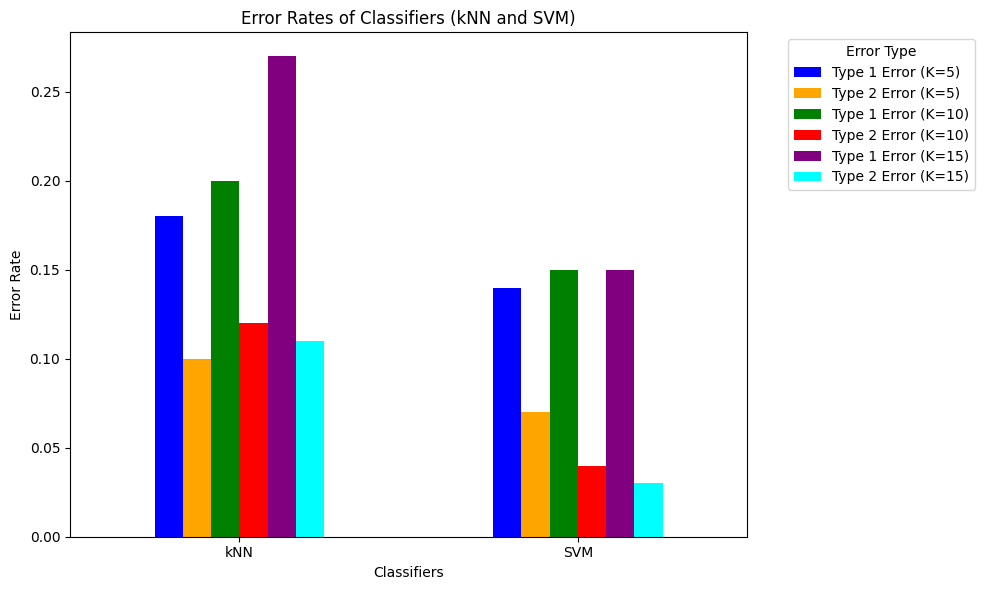


Conclusion:
- In the first part of the project, the classifiers were trained using the original 27 features. The kNN classifier exhibited Type 1 error rates of 0.12 across k values, indicating a consistent tendency for misclassifying 'Approved' applications as 'Denied.' Meanwhile, SVM maintained a lower Type 1 error rate of 0.04, showcasing its robustness.
- After applying PCA, the kNN classifier's Type 1 error rate increased significantly with higher values of K: 0.18 at K=5, 0.20 at K=10, and 0.27 at K=15, suggesting a tendency towards overfitting with more principal components.
- The SVM classifier displayed relatively stable Type 1 error rates across different K values, ranging from 0.14 to 0.15, indicating consistent performance even after dimensionality reduction.
- Type 2 error rates for kNN worsened with increasing K, going from 0.10 at K=5 to 0.11 at K=15, while the SVM showed a marked improvement, decreasing from 0.07 at K=5 to 0.03 at K=15, indicating enhanced detection of 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Updated results based on latest error rates summary
results = {
    "Classifier": ["kNN", "SVM"],
    "Type 1 Error (K=5)": [0.18, 0.14],
    "Type 2 Error (K=5)": [0.10, 0.07],
    "Type 1 Error (K=10)": [0.20, 0.15],
    "Type 2 Error (K=10)": [0.12, 0.04],
    "Type 1 Error (K=15)": [0.27, 0.15],
    "Type 2 Error (K=15)": [0.11, 0.03],
}

# Convert to DataFrame for better handling
results_df = pd.DataFrame(results)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
results_df.set_index("Classifier").plot(kind="bar", ax=ax, color=["blue", "orange", "green", "red", "purple", "cyan"])
ax.set_title("Error Rates of Classifiers (kNN and SVM)")
ax.set_ylabel("Error Rate")
ax.set_xlabel("Classifiers")
ax.legend(title="Error Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Conclusion
conclusion = """
Conclusion:
- In the first part of the project, the classifiers were trained using the original 27 features. The kNN classifier exhibited Type 1 error rates of 0.12 across k values, indicating a consistent tendency for misclassifying 'Approved' applications as 'Denied.' Meanwhile, SVM maintained a lower Type 1 error rate of 0.04, showcasing its robustness.
- After applying PCA, the kNN classifier's Type 1 error rate increased significantly with higher values of K: 0.18 at K=5, 0.20 at K=10, and 0.27 at K=15, suggesting a tendency towards overfitting with more principal components.
- The SVM classifier displayed relatively stable Type 1 error rates across different K values, ranging from 0.14 to 0.15, indicating consistent performance even after dimensionality reduction.
- Type 2 error rates for kNN worsened with increasing K, going from 0.10 at K=5 to 0.11 at K=15, while the SVM showed a marked improvement, decreasing from 0.07 at K=5 to 0.03 at K=15, indicating enhanced detection of denied applications.
- Overall, while both classifiers showed reasonable performance, the SVM demonstrated greater stability and lower Type 2 error rates across evaluated K values, making it the more reliable choice for this application.
- Future work could involve further hyperparameter tuning and the exploration of different SVM kernels to enhance performance even further.
"""

print(conclusion)